# Prophet Single (Univariate) Models

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import prophet
from sklearn.preprocessing import StandardScaler
# from statsmodels.tsa.arima.model import ARIMA
# from pmdarima.arima import auto_arima

Importing plotly failed. Interactive plots will not work.


In [2]:
# Importing imputed data

USA_train_imputed = pd.read_csv("USA_train_imputed copy.csv")
USA_test_imputed = pd.read_csv("USA_test_imputed copy.csv")
USA_train_imputed.set_index('date', inplace=True)
USA_test_imputed.set_index('date', inplace=True)

Brazil_train_imputed = pd.read_csv("Brazil_train_imputed copy.csv")
Brazil_test_imputed = pd.read_csv("Brazil_test_imputed copy.csv")
Brazil_train_imputed.set_index('date', inplace=True)
Brazil_test_imputed.set_index('date', inplace=True)

Germany_train_imputed = pd.read_csv("Germany_train_imputed copy.csv")
Germany_test_imputed = pd.read_csv("Germany_test_imputed copy.csv")
Germany_train_imputed.set_index('date', inplace=True)
Germany_test_imputed.set_index('date', inplace=True)

Nigeria_train_imputed = pd.read_csv("Nigeria_train_imputed copy.csv")
Nigeria_test_imputed = pd.read_csv("Nigeria_test_imputed copy.csv")
Nigeria_train_imputed.set_index('date', inplace=True)
Nigeria_test_imputed.set_index('date', inplace=True)

China_train_imputed = pd.read_csv("China_train_imputed copy.csv")
China_test_imputed = pd.read_csv("China_test_imputed copy.csv")
China_train_imputed.set_index('date', inplace=True)
China_test_imputed.set_index('date', inplace=True)

Australia_train_imputed = pd.read_csv("Australia_train_imputed copy.csv")
Australia_test_imputed = pd.read_csv("Australia_test_imputed copy.csv")
Australia_train_imputed.set_index('date', inplace=True)
Australia_test_imputed.set_index('date', inplace=True)

In [3]:
# Hyperparameter tuning
import itertools
from prophet.diagnostics import cross_validation, performance_metrics

In [4]:
!pip install pystan==2.19.1.1
!pip install fbprophet

In [5]:
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import TimeSeriesSplit

In [6]:
# Conducting Random Search for optimal hyperparamter tuning

# Loading the datasets
countries = ['USA', 'Brazil', 'Germany', 'Nigeria', 'China', 'Australia']
train_dfs = []
test_dfs = []

for country in countries:
    train_df = pd.read_csv(f"{country}_train_imputed copy.csv")
    test_df = pd.read_csv(f"{country}_test_imputed copy.csv")
    train_df.set_index('date', inplace=True)
    test_df.set_index('date', inplace=True)
    train_dfs.append(train_df)
    test_dfs.append(test_df)

# Combine train and test datasets for each country
for i in range(len(countries)):
    train_dfs[i]['set'] = 'train'
    test_dfs[i]['set'] = 'test'

# Combine all country datasets
all_data = pd.concat(train_dfs + test_dfs, ignore_index=True)

# Define the hyperparameter space for the random search
param_dist = {
    'growth': ['linear'],
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'changepoint_range': [0.8, 0.9],
    'seasonality_mode': ['additive', 'multiplicative'],
    'daily_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'yearly_seasonality': [True, False]
}

# Number of random samples
n_iter = 10

# Results list to store hyperparameter configurations and performance metrics
results = []

# Loop over countries
for i, country in enumerate(countries):
    print(f"\nProcessing {country}")

    # Filter data for the current country
    country_data = all_data[all_data['set'] == 'train']

    # Create a parameter sampler
    param_sampler = ParameterSampler(param_dist, n_iter=n_iter, random_state=42)

    # Loop over random samples
    for j, params in enumerate(param_sampler):
        print(f"\nFitting model {j + 1}/{n_iter}")

        # Create a Prophet model with the current hyperparameters
        model = Prophet(**params)

        # Fit the model on the training data
        model.fit(train_dfs[i][['new_cases']].reset_index().rename(columns={'date': 'ds', 'new_cases': 'y'}))

        # Make predictions on the test data
        future = model.make_future_dataframe(periods=len(test_dfs[i]))
        forecast = model.predict(future)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(test_dfs[i]['new_cases'], forecast.loc[forecast['ds'].isin(test_dfs[i].index)]['yhat']))

        # Store results
        results.append({
            'country': country,
            'params': params,
            'rmse': rmse
        })

# Convert results to DataFrame for analysis
results_df = pd.DataFrame(results)

# Find the best set of hyperparameters for each country
best_params_by_country = results_df.groupby('country')['params'].first()

# Display the best hyperparameters for each country
best_params_by_country

INFO:numexpr.utils:NumExpr defaulting to 8 threads.



Processing USA

Fitting model 1/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 2/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 3/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 4/10


INFO:cmdstanpy:start chain 1



Fitting model 5/10


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 6/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 7/10


INFO:cmdstanpy:start chain 1



Fitting model 8/10


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 9/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 10/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Processing Brazil

Fitting model 1/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 2/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 3/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 4/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 5/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 6/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 7/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 8/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 9/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 10/10

Processing Germany

Fitting model 1/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 2/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 3/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 4/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 5/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 6/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 7/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 8/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 9/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 10/10

Processing Nigeria


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 1/10


INFO:cmdstanpy:start chain 1



Fitting model 2/10


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1



Fitting model 3/10


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 4/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 5/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 6/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 7/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 8/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 9/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 10/10

Processing China


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 1/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 2/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 3/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 4/10


INFO:cmdstanpy:start chain 1



Fitting model 5/10


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 6/10

Fitting model 7/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 8/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 9/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 10/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Processing Australia

Fitting model 1/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 2/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 3/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 4/10

Fitting model 5/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 6/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 7/10


INFO:cmdstanpy:start chain 1



Fitting model 8/10


INFO:cmdstanpy:finish chain 1
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 9/10


INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1



Fitting model 10/10


country
Australia    {'yearly_seasonality': True, 'weekly_seasonali...
Brazil       {'yearly_seasonality': True, 'weekly_seasonali...
China        {'yearly_seasonality': True, 'weekly_seasonali...
Germany      {'yearly_seasonality': True, 'weekly_seasonali...
Nigeria      {'yearly_seasonality': True, 'weekly_seasonali...
USA          {'yearly_seasonality': True, 'weekly_seasonali...
Name: params, dtype: object

In [7]:
# Set the maximum display width for pandas in Jupyter Notebook
pd.set_option('display.max_colwidth', None)

# Display the DataFrame with all rows
print(best_params_by_country.to_string(max_rows=None))

# Reset display options to default if needed
pd.reset_option('display.max_colwidth')

country
Australia    {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}
Brazil       {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}
China        {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}
Germany      {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}
Nige

# USA model (Prophet Univariate)
Opitmal hyperparamter tunning: USA {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}

In [8]:
train_target = USA_train_imputed['new_cases']
test_target = USA_test_imputed['new_cases']

In [9]:
# Training model based on optimal hyperparameters with train data
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_prior_scale=0.01, seasonality_mode ='multiplicative', growth='linear', daily_seasonality=False, changepoint_range=0.8, changepoint_prior_scale=0.1).fit(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [10]:
# Make predictions for train data and looking at train RMSE
train_pred = model.predict(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
train_rmse = np.sqrt(mean_squared_error(train_pred['yhat'], train_target))
train_rmse

44689.734362192205

In [11]:
# Make dataframes for the purposes of plotting visualization
df_train_plot = train_target.copy()
df_train_pred_plot = train_pred['yhat']

df_train_pred_plot.index = df_train_plot.index # This makes the formatting of the dates of the training and prediction data match (there were issues with train_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 44689.73")

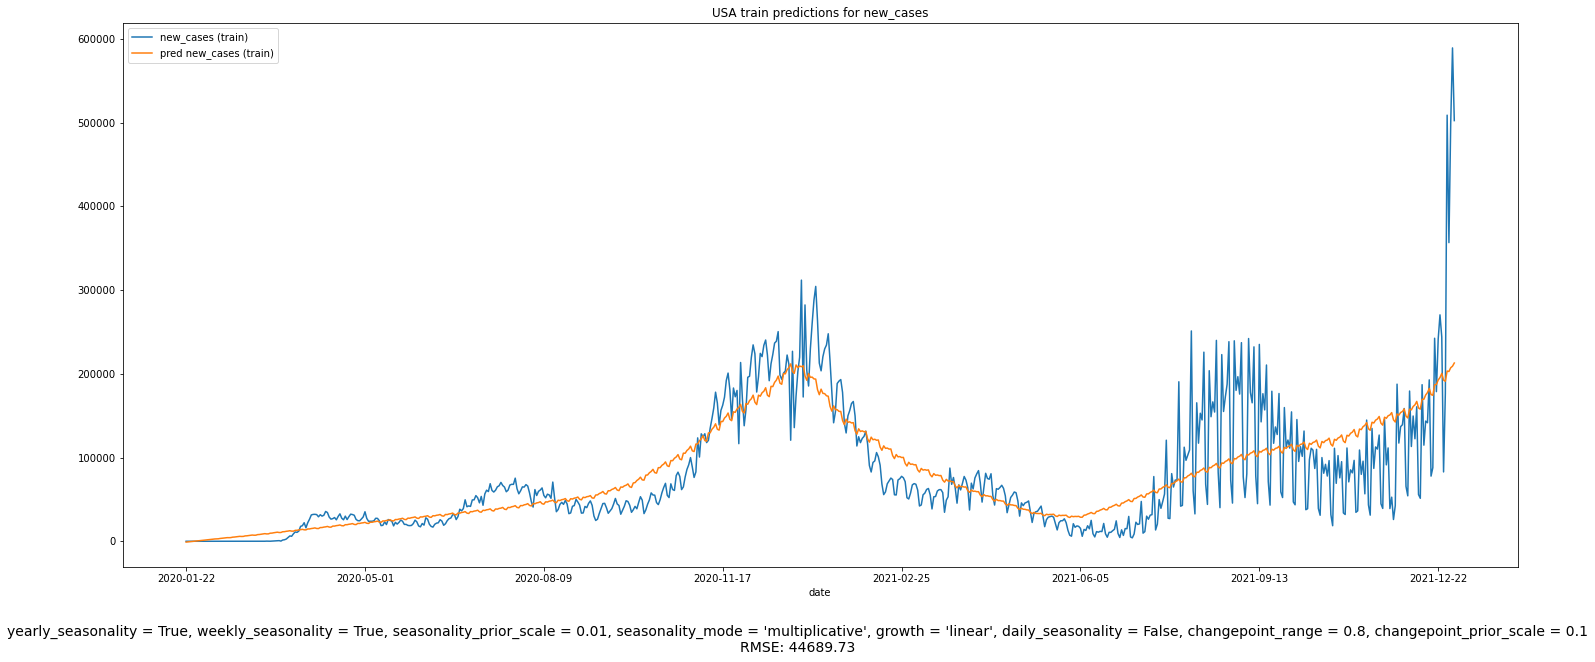

In [12]:
pd.concat([df_train_plot,df_train_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (train)', 'pred new_cases (train)'])
plt.title("USA train predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {train_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

In [13]:
# Make predictions for test data and looking at test RMSE
test_pred = model.predict(test_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
test_rmse = np.sqrt(mean_squared_error(test_pred['yhat'], test_target))
test_rmse

383248.51777270675

In [14]:
# Make dataframes for the purposes of plotting visualization
df_test_plot = test_target.copy()
df_test_pred_plot = test_pred['yhat']

df_test_pred_plot.index = df_test_plot.index # This makes the formatting of the dates of the testting and prediction data match (there were issues with test_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 383248.52")

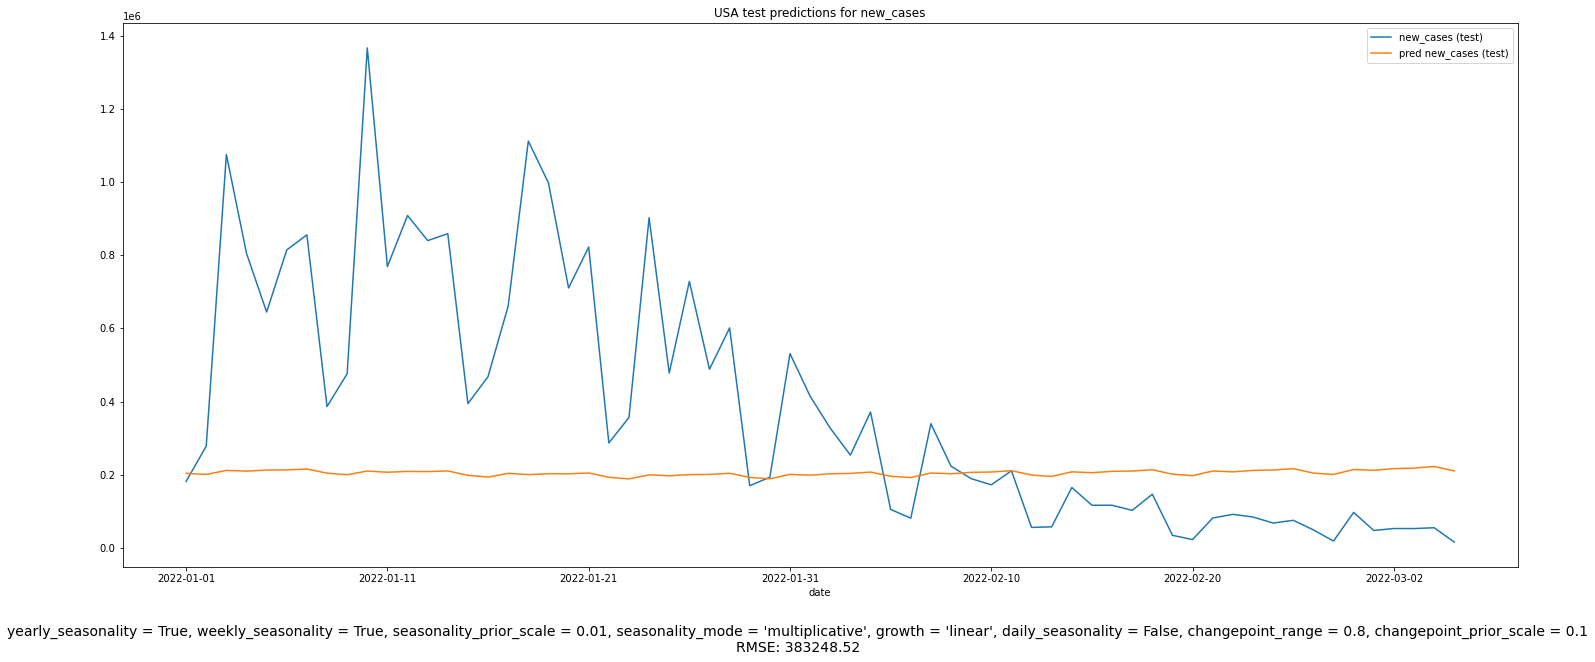

In [15]:
pd.concat([df_test_plot,df_test_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (test)', 'pred new_cases (test)'])
plt.title("USA test predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {test_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

# Brazil model (Prophet Univariate)
Optimal  hyperparamter tuning: Brazil       {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}

In [16]:
train_target = Brazil_train_imputed['new_cases']
test_target = Brazil_test_imputed['new_cases']

In [17]:
# Training model based on optimal hyperparameters with train data
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_prior_scale=0.01, seasonality_mode ='multiplicative', growth='linear', daily_seasonality=False, changepoint_range=0.8, changepoint_prior_scale=0.1).fit(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [18]:
# Make predictions for train data and looking at train RMSE
train_pred = model.predict(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
train_rmse = np.sqrt(mean_squared_error(train_pred['yhat'], train_target))
train_rmse

11011.50120049812

In [19]:
# Make dataframes for the purposes of plotting visualization
df_train_plot = train_target.copy()
df_train_pred_plot = train_pred['yhat']

df_train_pred_plot.index = df_train_plot.index # This makes the formatting of the dates of the training and prediction data match (there were issues with train_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 11011.50")

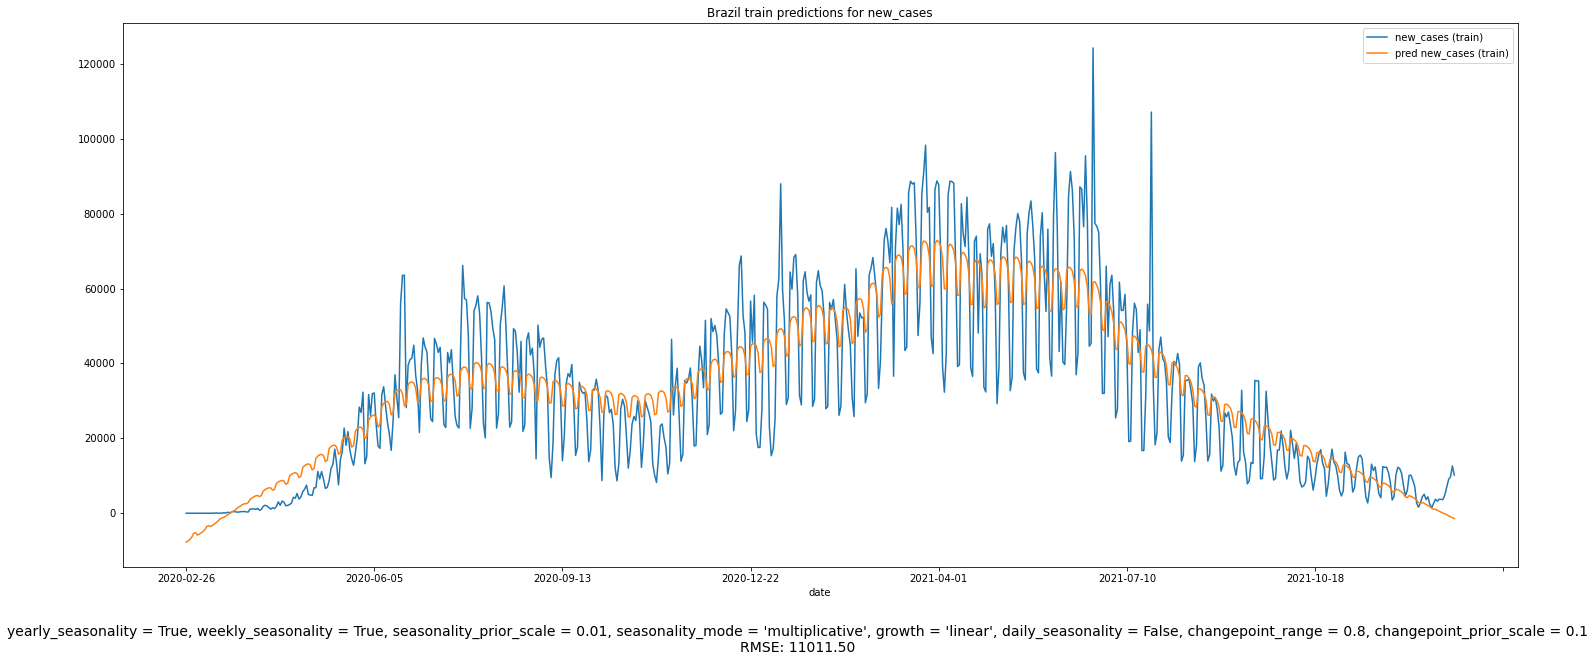

In [20]:
pd.concat([df_train_plot,df_train_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (train)', 'pred new_cases (train)'])
plt.title("Brazil train predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {train_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

In [21]:
# Make predictions for test data and looking at test RMSE
test_pred = model.predict(test_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
test_rmse = np.sqrt(mean_squared_error(test_pred['yhat'], test_target))
test_rmse

133701.0266676716

In [22]:
# Make dataframes for the purposes of plotting visualization
df_test_plot = test_target.copy()
df_test_pred_plot = test_pred['yhat']

df_test_pred_plot.index = df_test_plot.index # This makes the formatting of the dates of the testting and prediction data match (there were issues with test_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 133701.03")

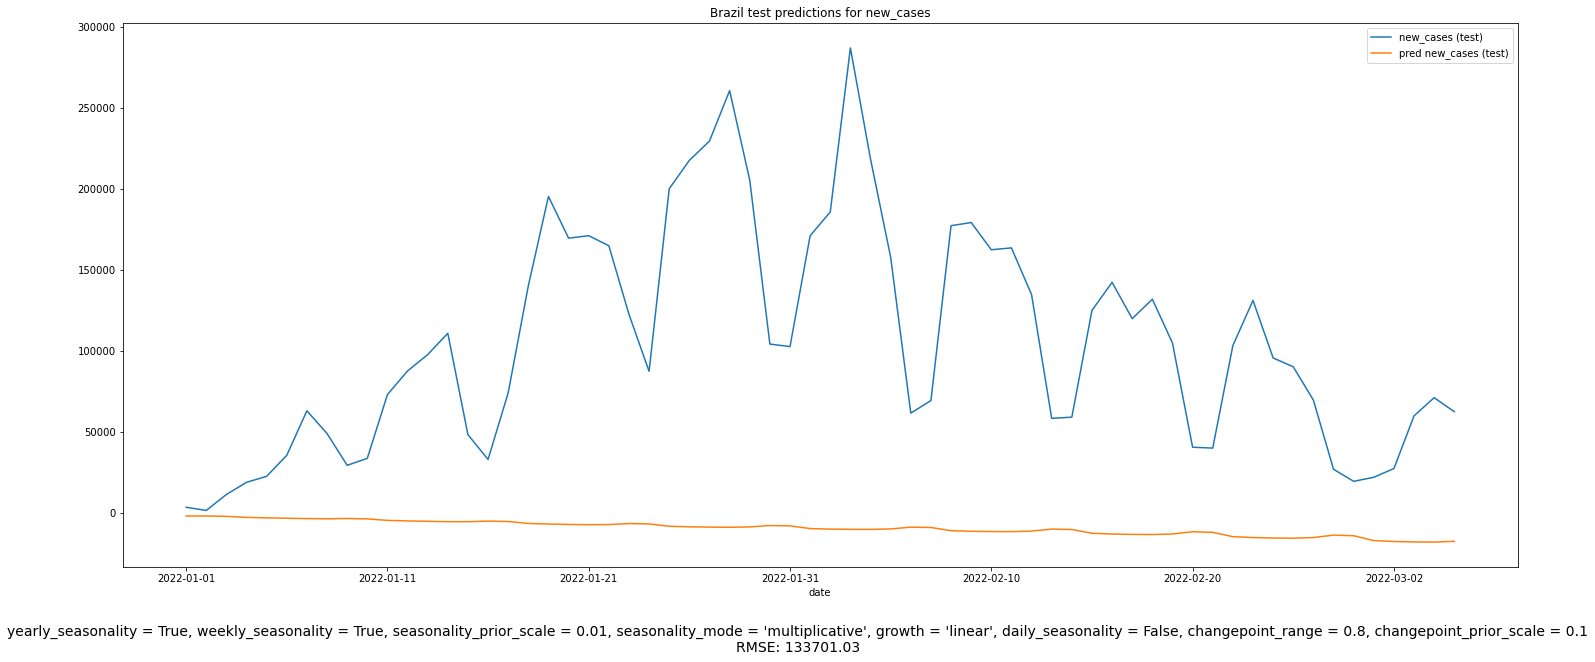

In [23]:
pd.concat([df_test_plot,df_test_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (test)', 'pred new_cases (test)'])
plt.title("Brazil test predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {test_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

# Germany model (Prophet Univariate)
Germany      {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}

In [24]:
train_target = Germany_train_imputed['new_cases']
test_target = Germany_test_imputed['new_cases']

In [25]:
# Training model based on optimal hyperparameters with train data
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_prior_scale=0.01, seasonality_mode ='multiplicative', growth='linear', daily_seasonality=False, changepoint_range=0.8, changepoint_prior_scale=0.1).fit(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [26]:
# Make predictions for train data and looking at train RMSE
train_pred = model.predict(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
train_rmse = np.sqrt(mean_squared_error(train_pred['yhat'], train_target))
train_rmse

8223.317515333778

In [27]:
# Make dataframes for the purposes of plotting visualization
df_train_plot = train_target.copy()
df_train_pred_plot = train_pred['yhat']

df_train_pred_plot.index = df_train_plot.index # This makes the formatting of the dates of the training and prediction data match (there were issues with train_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 8223.32")

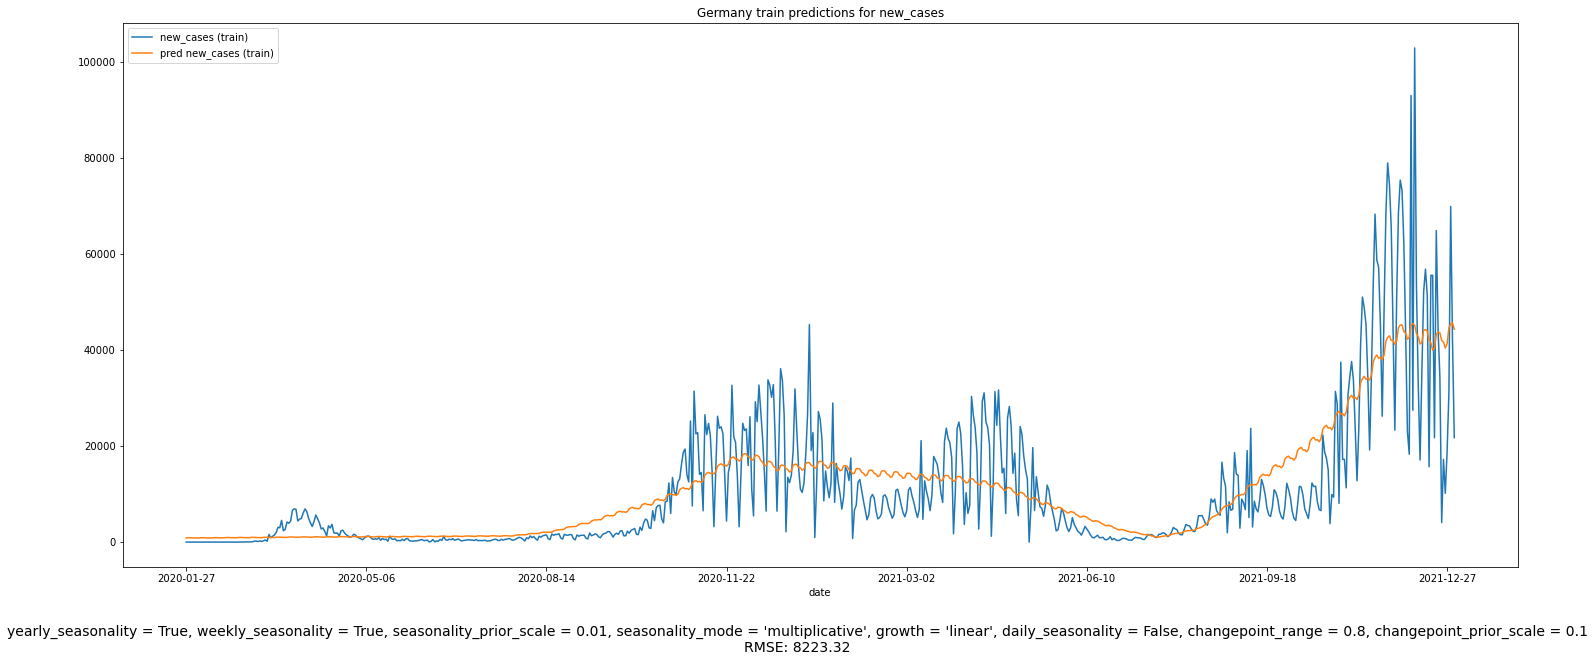

In [28]:
pd.concat([df_train_plot,df_train_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (train)', 'pred new_cases (train)'])
plt.title("Germany train predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {train_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

In [29]:
# Make predictions for test data and looking at test RMSE
test_pred = model.predict(test_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
test_rmse = np.sqrt(mean_squared_error(test_pred['yhat'], test_target))
test_rmse

114300.50039959665

In [30]:
# Make dataframes for the purposes of plotting visualization
df_test_plot = test_target.copy()
df_test_pred_plot = test_pred['yhat']

df_test_pred_plot.index = df_test_plot.index # This makes the formatting of the dates of the testting and prediction data match (there were issues with test_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 114300.50")

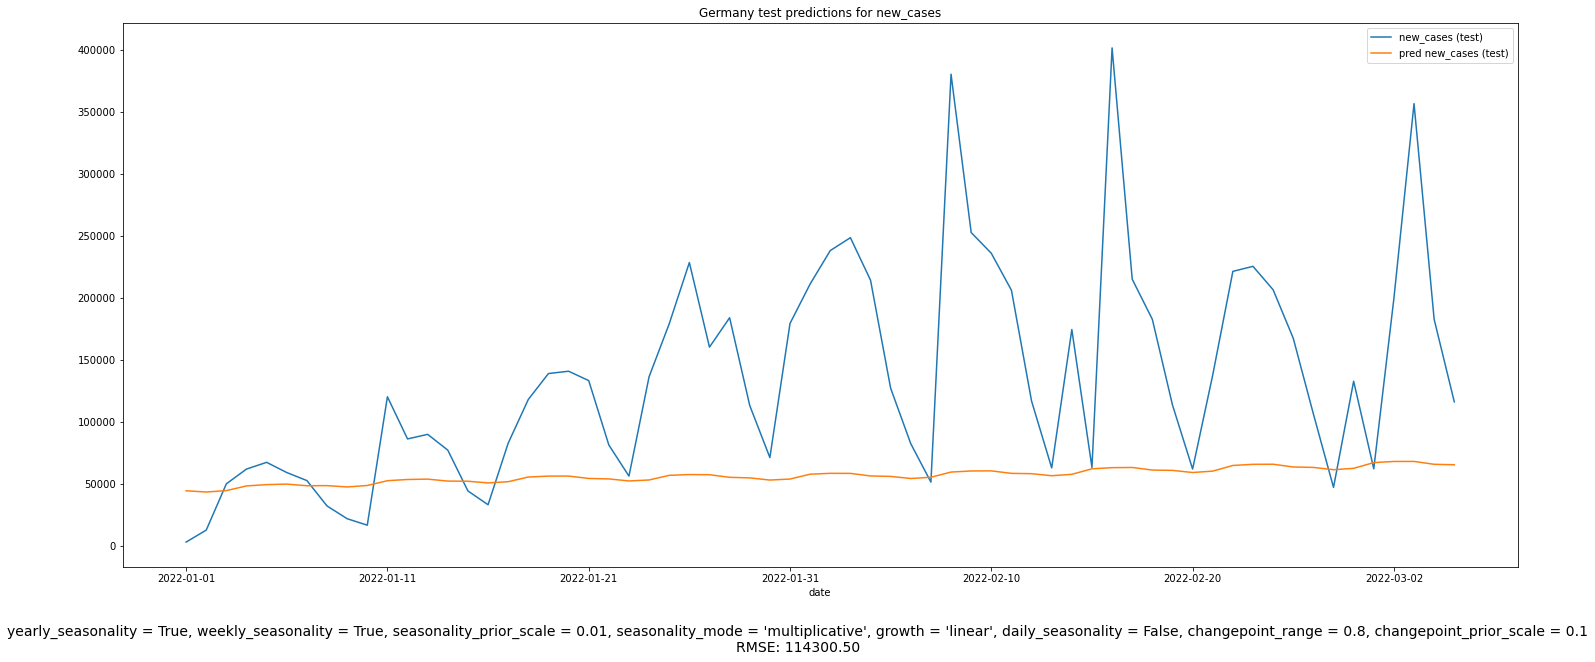

In [31]:
pd.concat([df_test_plot,df_test_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (test)', 'pred new_cases (test)'])
plt.title("Germany test predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {test_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

# China model (Prophet Univariate)
China        {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}

In [32]:
train_target = China_train_imputed['new_cases']
test_target = China_test_imputed['new_cases']

In [33]:
# Training model based on optimal hyperparameters with train data
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_prior_scale=0.01, seasonality_mode ='multiplicative', growth='linear', daily_seasonality=False, changepoint_range=0.8, changepoint_prior_scale=0.1).fit(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [34]:
# Make predictions for train data and looking at train RMSE
train_pred = model.predict(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
train_rmse = np.sqrt(mean_squared_error(train_pred['yhat'], train_target))
train_rmse

600.7934363068454

In [35]:
# Make dataframes for the purposes of plotting visualization
df_train_plot = train_target.copy()
df_train_pred_plot = train_pred['yhat']

df_train_pred_plot.index = df_train_plot.index # This makes the formatting of the dates of the training and prediction data match (there were issues with train_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 600.79")

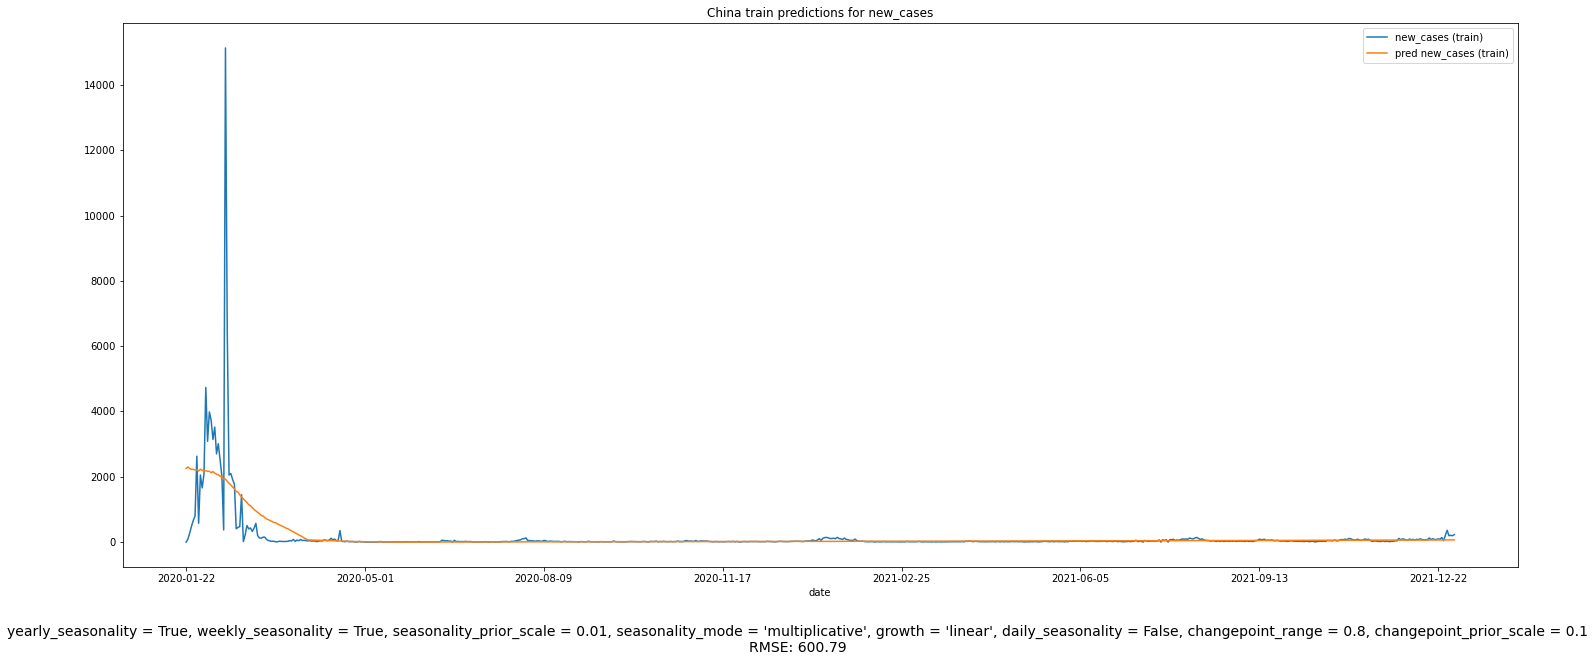

In [36]:
pd.concat([df_train_plot,df_train_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (train)', 'pred new_cases (train)'])
plt.title("China train predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {train_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

In [37]:
# Make predictions for test data and looking at test RMSE
test_pred = model.predict(test_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
test_rmse = np.sqrt(mean_squared_error(test_pred['yhat'], test_target))
test_rmse

98.46821651199733

In [38]:
# Make dataframes for the purposes of plotting visualization
df_test_plot = test_target.copy()
df_test_pred_plot = test_pred['yhat']

df_test_pred_plot.index = df_test_plot.index # This makes the formatting of the dates of the testting and prediction data match (there were issues with test_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 98.47")

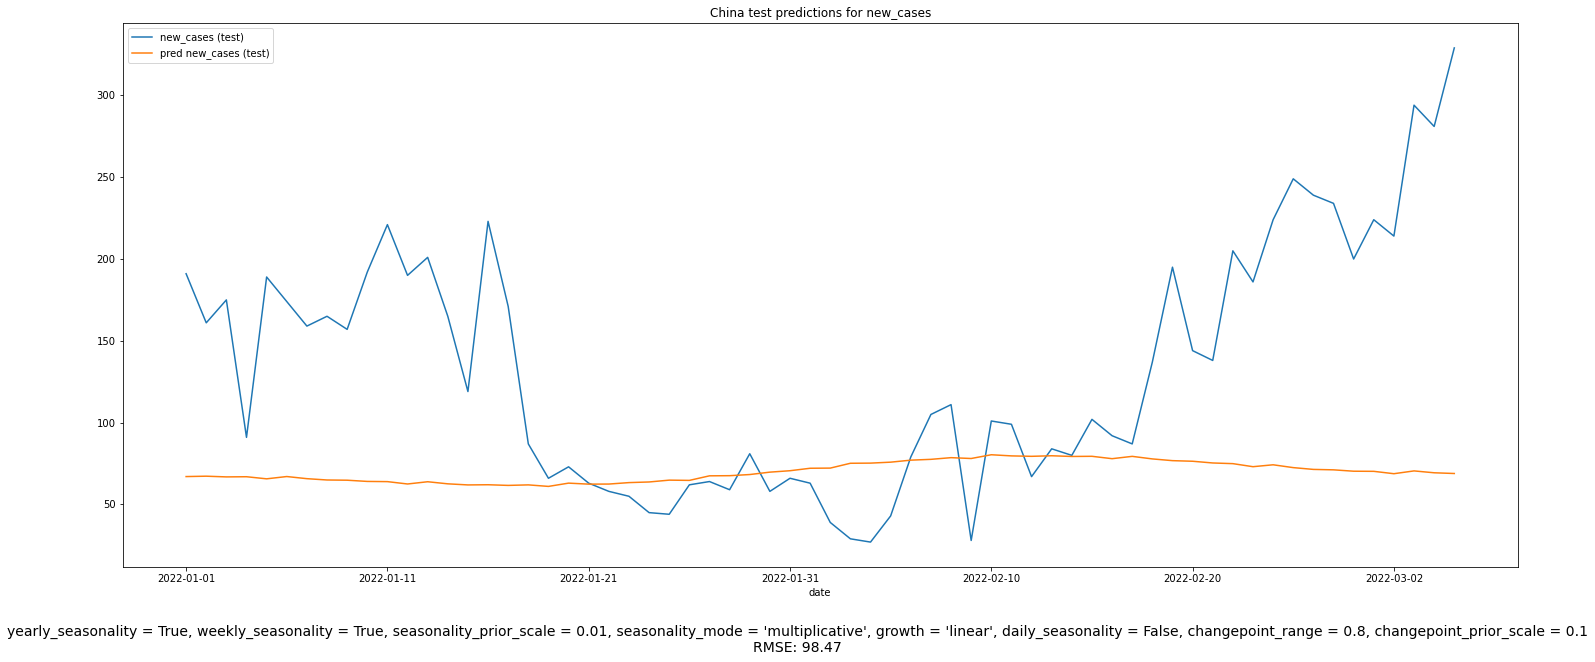

In [39]:
pd.concat([df_test_plot,df_test_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (test)', 'pred new_cases (test)'])
plt.title("China test predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {test_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

# Nigeria model (Prophet Unnivariate)
Nigeria      {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1

In [40]:
train_target = Nigeria_train_imputed['new_cases']
test_target = Nigeria_test_imputed['new_cases']

In [41]:
# Training model based on optimal hyperparameters with train data
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_prior_scale=0.01, seasonality_mode ='multiplicative', growth='linear', daily_seasonality=False, changepoint_range=0.8, changepoint_prior_scale=0.1).fit(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [42]:
# Make predictions for train data and looking at train RMSE
train_pred = model.predict(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
train_rmse = np.sqrt(mean_squared_error(train_pred['yhat'], train_target))
train_rmse

333.9774009087185

In [43]:
# Make dataframes for the purposes of plotting visualization
df_train_plot = train_target.copy()
df_train_pred_plot = train_pred['yhat']

df_train_pred_plot.index = df_train_plot.index # This makes the formatting of the dates of the training and prediction data match (there were issues with train_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 333.98")

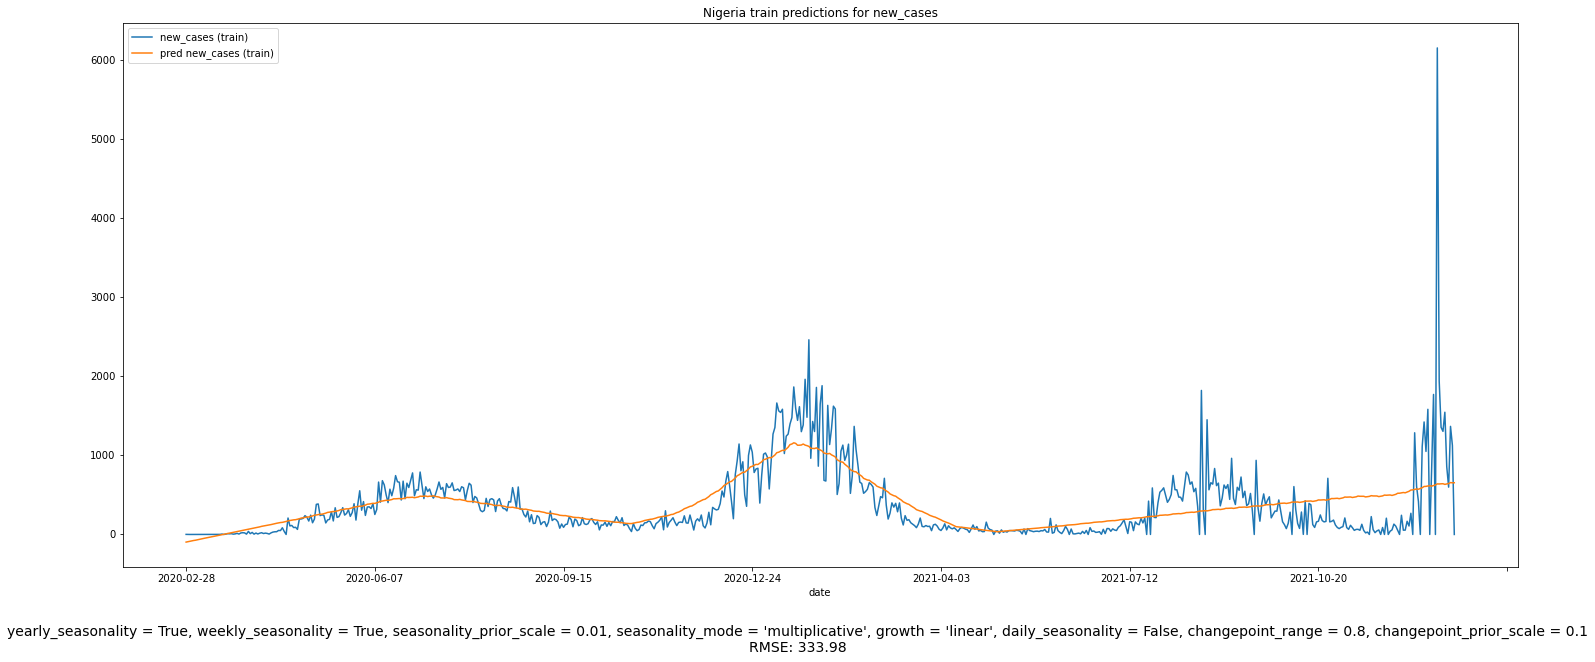

In [44]:
pd.concat([df_train_plot,df_train_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (train)', 'pred new_cases (train)'])
plt.title("Nigeria train predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {train_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

In [45]:
# Make predictions for test data and looking at test RMSE
test_pred = model.predict(test_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
test_rmse = np.sqrt(mean_squared_error(test_pred['yhat'], test_target))
test_rmse

605.5290273522177

In [46]:
# Make dataframes for the purposes of plotting visualization
df_test_plot = test_target.copy()
df_test_pred_plot = test_pred['yhat']

df_test_pred_plot.index = df_test_plot.index # This makes the formatting of the dates of the testting and prediction data match (there were issues with test_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 605.53")

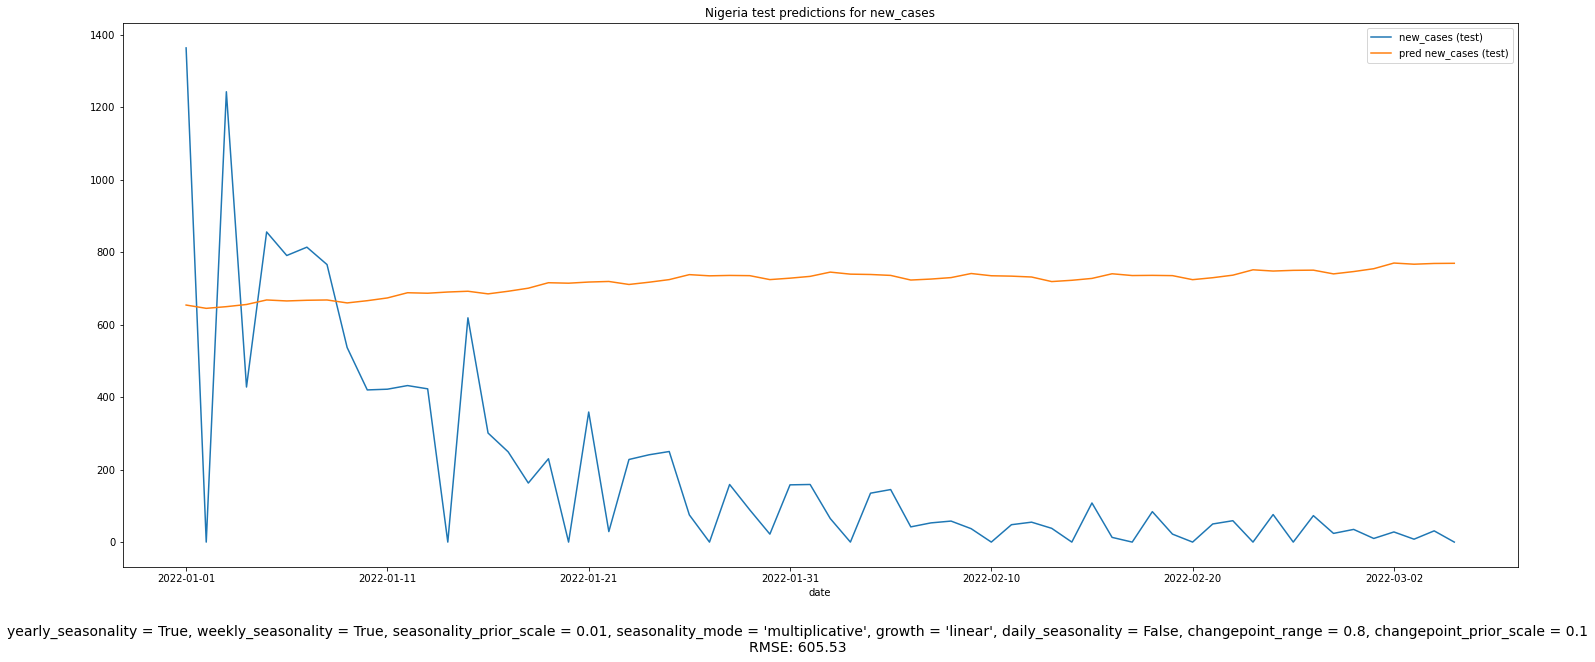

In [47]:
pd.concat([df_test_plot,df_test_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (test)', 'pred new_cases (test)'])
plt.title("Nigeria test predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {test_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

# Australia model (Prophet Univariate)
Australia    {'yearly_seasonality': True, 'weekly_seasonality': True, 'seasonality_prior_scale': 0.01, 'seasonality_mode': 'multiplicative', 'growth': 'linear', 'daily_seasonality': False, 'changepoint_range': 0.8, 'changepoint_prior_scale': 0.1}

In [48]:
train_target = Australia_train_imputed['new_cases']
test_target = Australia_test_imputed['new_cases']

In [49]:
# Training model based on optimal hyperparameters with train data
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_prior_scale=0.01, seasonality_mode ='multiplicative', growth='linear', daily_seasonality=False, changepoint_range=0.8, changepoint_prior_scale=0.1).fit(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'}))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [50]:
# Make predictions for train data and looking at train RMSE
train_pred = model.predict(train_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
train_rmse = np.sqrt(mean_squared_error(train_pred['yhat'], train_target))
train_rmse

1661.6373038098145

In [51]:
# Make dataframes for the purposes of plotting visualization
df_train_plot = train_target.copy()
df_train_pred_plot = train_pred['yhat']

df_train_pred_plot.index = df_train_plot.index # This makes the formatting of the dates of the training and prediction data match (there were issues with train_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 1661.64")

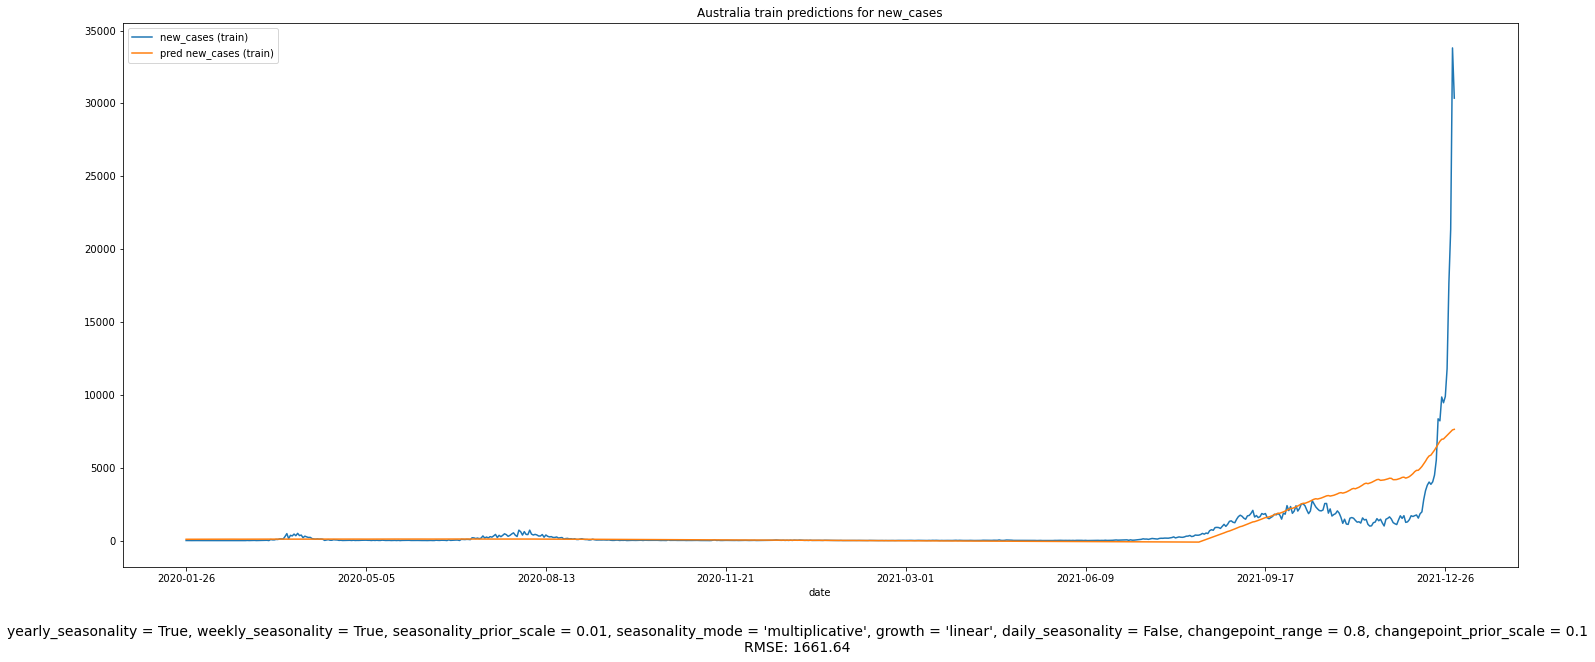

In [52]:
pd.concat([df_train_plot,df_train_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (train)', 'pred new_cases (train)'])
plt.title("Australia train predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {train_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)

In [53]:
# Make predictions for test data and looking at test RMSE
test_pred = model.predict(test_target.reset_index().rename(columns={'date':'ds', 'new_cases':'y'})).set_index('ds')
test_rmse = np.sqrt(mean_squared_error(test_pred['yhat'], test_target))
test_rmse

51170.041013477734

In [54]:
# Make dataframes for the purposes of plotting visualization
df_test_plot = test_target.copy()
df_test_pred_plot = test_pred['yhat']

df_test_pred_plot.index = df_test_plot.index # This makes the formatting of the dates of the testting and prediction data match (there were issues with test_pred having additional timestamps, which affected the visualization)

Text(0.5, 0.01, "yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1\nRMSE: 51170.04")

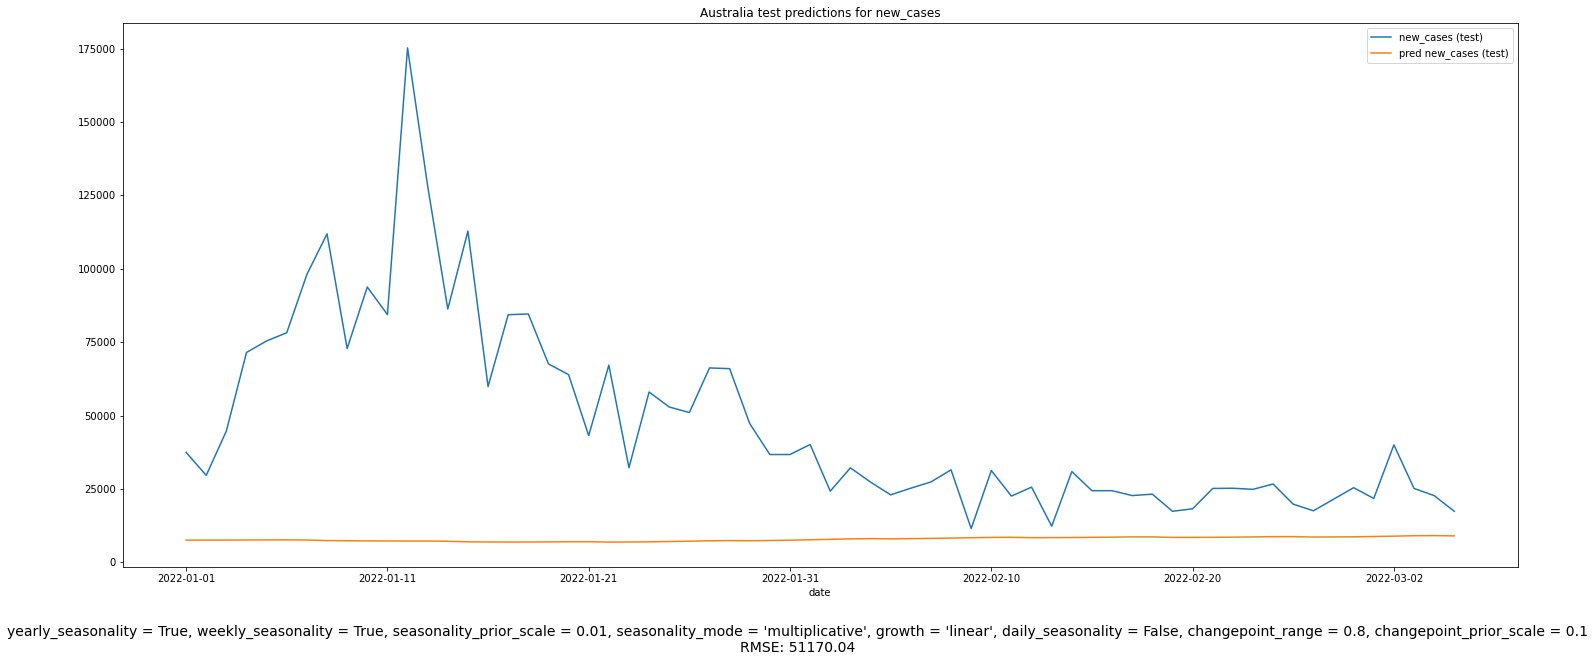

In [55]:
pd.concat([df_test_plot,df_test_pred_plot], axis=1).plot(figsize=(25,10)) 
# Original concatting was producing data that was not properly layed on top of each other
plt.legend(['new_cases (test)', 'pred new_cases (test)'])
plt.title("Australia test predictions for new_cases")
txt="yearly_seasonality = True, weekly_seasonality = True, seasonality_prior_scale = 0.01, seasonality_mode = 'multiplicative', growth = 'linear', daily_seasonality = False, changepoint_range = 0.8, changepoint_prior_scale = 0.1"
txt += f"\nRMSE: {test_rmse:.2f}"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=14)